# Crime Report

### The dataset is collected from the City of Vancouver Open Data Catalogue. It contains the crime records from 2013 to 2019.

### Disclaimer
Data provided does not reflect the total number of calls or complaints made to the Vancouver Police Department. Only the categories described in the attributes and that occurred from January 1, 2003, are included. Certain crimes are excluded for privacy and investigative reasons.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

#jupyter intelisense
%config IPCompleter.greedy=True

In [2]:
crime_df = pd.read_csv('downloads/crime_records.csv')

In [3]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608815 entries, 0 to 608814
Data columns (total 10 columns):
TYPE             608815 non-null object
YEAR             608815 non-null int64
MONTH            608815 non-null int64
DAY              608815 non-null int64
HOUR             547782 non-null float64
MINUTE           547782 non-null float64
HUNDRED_BLOCK    608802 non-null object
NEIGHBOURHOOD    545333 non-null object
X                608815 non-null float64
Y                608815 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 46.4+ MB


In [4]:
crime_df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Theft from Vehicle,2003,6,28,13.0,30.0,8XX EXPO BLVD,Central Business District,491771.63,5458295.01
1,Theft from Vehicle,2003,11,17,16.0,0.0,56XX OAK ST,South Cambie,490682.32,5453536.96
2,Theft from Vehicle,2003,12,30,14.0,0.0,85XX STANLEY PARK DR,Stanley Park,489104.19,5460347.36
3,Theft of Vehicle,2003,1,15,14.0,45.0,6XX W 41ST AVE,Oakridge,491372.94,5453422.83
4,Theft from Vehicle,2003,12,28,16.0,45.0,85XX STANLEY PARK DR,Stanley Park,489104.19,5460347.36


## Issue at hand

The Vancouver Police Department has some staffing issues and the department wants to know how they would reallocate their resources accordingly. 


### Timing is the key

Criminals don't want to get caught and be seen. The theory would be that majority of the resources would be needed during the night time. 

## Let's review the different type of criminal activity

What are the different types of activities and let's compare them to when the following crimes are happening.

In [5]:
crime_df['TYPE'].unique()

array(['Theft from Vehicle', 'Theft of Vehicle',
       'Break and Enter Residential/Other', 'Mischief',
       'Offence Against a Person',
       'Vehicle Collision or Pedestrian Struck (with Injury)',
       'Other Theft', 'Homicide',
       'Vehicle Collision or Pedestrian Struck (with Fatality)',
       'Break and Enter Commercial', 'Theft of Bicycle'], dtype=object)

### Organizing the different criminal activities

Let's update the data to show the major types, (1) Auto Theft, (2) Breaking and Entering, (3) Other Theft, (4) Vehicle Collision, (5) Mischief, and (6) Homicide

In [6]:
# overwriting/replaced value
crime_df['TYPE']= crime_df['TYPE'].replace(['Theft from Vehicle', 'Theft of Vehicle'], 'Auto Theft') 
crime_df['TYPE']= crime_df['TYPE'].replace(['Break and Enter Residential/Other', 'Break and Enter Commercial'], 'Breaking and Entering')
crime_df['TYPE']= crime_df['TYPE'].replace(['Theft of Bicycle'], 'Other Theft')
crime_df['TYPE']= crime_df['TYPE'].replace(['Vehicle Collision or Pedestrian Struck (with Injury)', 'Vehicle Collision or Pedestrian Struck (with Fatality)'], 'Vehicle Collision') 
crime_df['TYPE']= crime_df['TYPE'].replace(['Offence Against a Person'], 'Mischief')

In [7]:
crime_df['TYPE'].unique()

array(['Auto Theft', 'Breaking and Entering', 'Mischief',
       'Vehicle Collision', 'Other Theft', 'Homicide'], dtype=object)

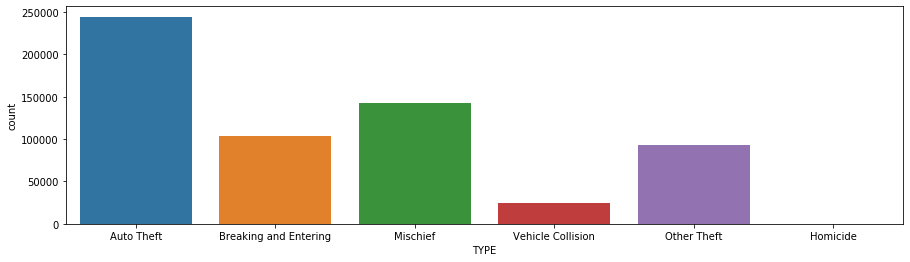

In [8]:
x = crime_df['TYPE']
#y = crime_df['MONTH']
fig = plt.figure(figsize=(15,4))

sns.countplot(x, data=crime_df)

From the graph shown above, **Auto Theft** is the number one crime followed by **Mischief** and **Breaking and Entering**.

But the question is when do we need to allocate the resources?

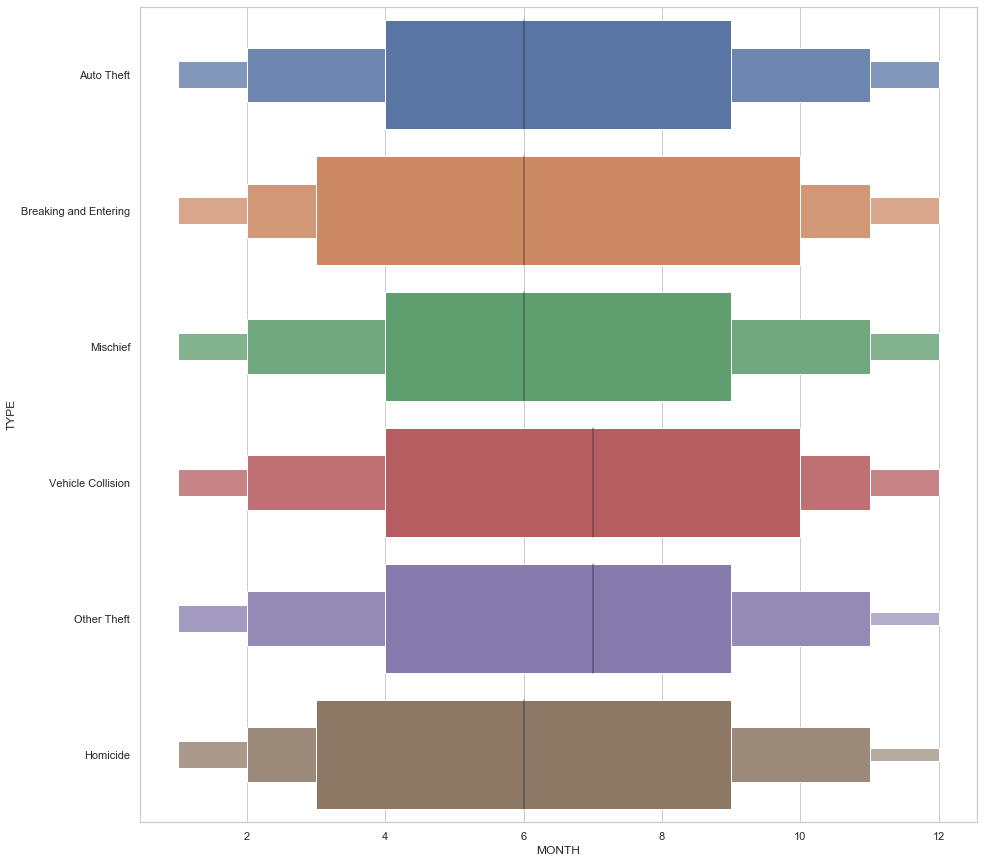

In [9]:
x = crime_df['TYPE']
y = crime_df['MONTH']
sns.set(style="whitegrid")

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

fig = plt.figure(figsize=(15,15))
sns.boxenplot(y, x, data=crime_df)

Now we know that majority of crimes happens between **March** (Spring) to **October** (Fall)

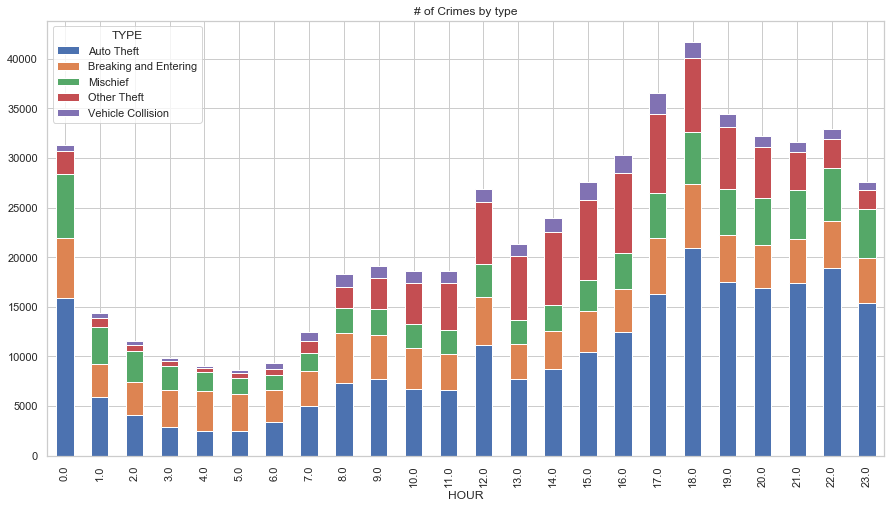

In [10]:
types = ['Auto Theft', 'Breaking and Entering', 'Mischief',
       'Vehicle Collision', 'Other Theft', 'Homicide']

crimes_by_type = crime_df.copy()
crimes_by_type = crimes_by_type[crimes_by_type['TYPE'].isin(types)]
crimes_by_type = crimes_by_type.groupby(['HOUR','TYPE']).size().reset_index(name='# of Crimes')

crimes_by_type_pivot = pd.pivot_table(crimes_by_type, index=['HOUR'], columns = ['TYPE'], values='# of Crimes', aggfunc=np.sum)

crimes_by_type_pivot.plot(kind='bar', stacked=True, figsize=(15,8), title ='# of Crimes by type')

### Location, Location, Location

Where do we need to add more police force?

In [11]:
crime_df['NEIGHBOURHOOD'].unique()

array(['Central Business District', 'South Cambie', 'Stanley Park',
       'Oakridge', 'Kensington-Cedar Cottage', 'Fairview', 'Strathcona',
       'Grandview-Woodland', 'Kitsilano', nan, 'Hastings-Sunrise',
       'West End', 'Marpole', 'Mount Pleasant', 'Sunset', 'Killarney',
       'Riley Park', 'Renfrew-Collingwood', 'Arbutus Ridge',
       'Shaughnessy', 'Kerrisdale', 'West Point Grey',
       'Dunbar-Southlands', 'Victoria-Fraserview', 'Musqueam'],
      dtype=object)

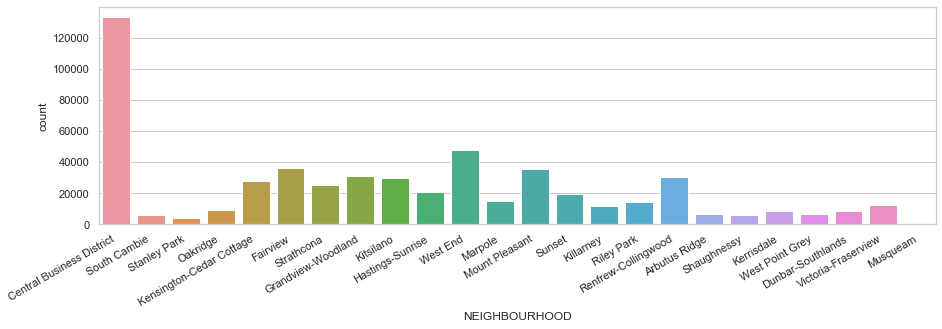

In [12]:
#show top crime neighborhoods
nhood = crime_df['NEIGHBOURHOOD']
fig = plt.figure(figsize=(15,4))
g=sns.countplot(nhood, data=crime_df)
g.set_xticklabels(g.get_xticklabels(),rotation=30,ha='right')
plt.show()

From the data above most crime activities happens in the *Central Business District* followed by *West End* and *Fairview*. 

---
### Conclusion
Based from the data analysis most of the crimanal activities happens during 6:00pm. When the unexpected victim is having dinner. The evening hours is when you see the most crime. Also note that Central Business District and West End are the two top crime infested neighborhoods.

### Hypothesis
Based on the conclusion and the data from the analysis most crime happen 5:00 pm until midnight.


### Rolled Out Plan
During the hours from 5:00 pm to Midnight is when most man power resources are needed. Our proposal we would increase our police visibility by 25% to decrease the crime during peak hours. We will test this for 4 weeks by sending more police force in Central Business District and keeping the same amount of police force in West End. 

### Success Metric
If the crime rate decrease by 20% or more in Central Business District and that the t-test between Central Business District and West End shows significant difference then we can conclude that our A/B testing was successful.

### Secondary Metric
We can watch the number of criminal activites in the nearby neighborhood to ensure that we didn't increase the crime rate by increasing the police force in Central Business District during the 4 week test.